In [1]:
#!pip install PyMySQL
#!pip install pandas-profiling
import pymysql
import pymysql.cursors
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.cluster import KMeans

In [2]:
aug_train = pd.read_csv('C:/Users/ashut/OneDrive/Desktop/DataScienceForGood/Session1/aug_train.csv', header= 0, sep=',')
print("The training dataframe dimensions are " + str(aug_train.shape) + ".\n")
#aug_train.sample(10)
aug_test = pd.read_csv('C:/Users/ashut/OneDrive/Desktop/DataScienceForGood/Session1/aug_test.csv', header= 0, sep=',')
print("The test dataframe dimensions are " + str(aug_test.shape) + ".\n")
#aug_test.sample(10)

df = aug_train
# Running a pandas profiling profile report on our DataFrame (takes a long time)
# only need to do it once
#report = df.profile_report() 
#report.to_file("HR_Report.html")


The training dataframe dimensions are (19158, 14).

The test dataframe dimensions are (2129, 13).



In [3]:
#print(df.groupby(['enrollee_id']).size() )
print(df.groupby(['city']).size() )
print(df.groupby(['city_development_index']).size() )
print(df.groupby(['gender']).size() )
print(df.groupby(['relevent_experience']).size() )
print(df.groupby(['enrolled_university']).size() )
print(df.groupby(['education_level']).size() )
print(df.groupby(['major_discipline']).size() )
print(df.groupby(['experience']).size() )
print(df.groupby(['company_size']).size() )
print(df.groupby(['company_type']).size() )
print(df.groupby(['last_new_job']).size() )
print(df.groupby(['training_hours']).size() )
print(df.groupby(['target']).size() )
#df['last_new_job'] = df['last_new_job'].replace(np.nan, -1)
set(df['last_new_job'])

city
city_1       26
city_10      86
city_100    275
city_101     75
city_102    304
           ... 
city_93      26
city_94      26
city_97     104
city_98      79
city_99      94
Length: 123, dtype: int64
city_development_index
0.448      17
0.479      28
0.487       5
0.493      13
0.512       5
         ... 
0.924     301
0.925     171
0.926    1336
0.939     497
0.949      79
Length: 93, dtype: int64
gender
Female     1238
Male      13221
Other       191
dtype: int64
relevent_experience
Has relevent experience    13792
No relevent experience      5366
dtype: int64
enrolled_university
Full time course     3757
Part time course     1198
no_enrollment       13817
dtype: int64
education_level
Graduate          11598
High School        2017
Masters            4361
Phd                 414
Primary School      308
dtype: int64
major_discipline
Arts                 253
Business Degree      327
Humanities           669
No Major             223
Other                381
STEM               144

{'1', '2', '3', '4', '>4', nan, 'never'}

In [4]:
print("The initial null values: \n")
print(df.isnull().sum())

The initial null values: 

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [5]:
# Initially we are removing the null values. We might convert them to defaults after more analysis.
#df.dropna(subset=['gender', 'major_discipline', 'company_size', 'company_type', 'last_new_job', 'enrolled_experience'], inplace=True)

#Note when can use factorize to automatically make the enumeration but then the data won't be ordinal
#Converting categorical data to an enumeration to make statistical analysis possible
df['gender'] = df['gender'].map({np.nan:-1,'Male':0, 'Female': 1, 'Other':2})                                 

df['major_discipline'],unique_major_discipline = pd.factorize(df['major_discipline'], na_sentinel = -1)
df['city'],unique_city = pd.factorize(df['city'],sort=False, na_sentinel = -1)

df['enrolled_university'] = df['enrolled_university'].map({np.nan:-1,'no_enrollment':0, 'Part time course': 1, 'Full time course': 2})
df['major_discipline'],unique_major_discipline = pd.factorize(df['major_discipline'], na_sentinel = -1)
df['company_type'],unique_company_type = pd.factorize(df['company_type'], na_sentinel = -1)
df['relevent_experience'] = df['relevent_experience'].map({'No relevent experience':0, 'Has relevent experience': 1})

#Needs manual factor so it can be ordinal
#df['last_new_job'],unique_last_new_job = pd.factorize(df['last_new_job']) #can't use factorize 
df['last_new_job'] = df['last_new_job'].map({np.nan:-1,'never':0, '1': 1, '2':2, '3':3, '4':4, '>4':5})
#df['company_size'],unique_50-99company_size = pd.factorize(df['company_size'])                               
df['company_size'] = df['company_size'].map({np.nan:-1,'<10':0, '10/49': 1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5,
                                             '5000-9999':6, '10000+':7})                                 
#df['experience'],unique_experience = pd.factorize(df['experience'],sort=False, na_sentinel = -1)
df['experience'] = df['experience'].map({np.nan:-1,'<1':0, '1': 1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7,'8':8,'9':9,'10':10,
                                         '11':11,'12':12,'13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20, '>20':21 })
df['education_level'] = df['education_level'].map({np.nan:-1, 'Primary School':0, 'High School': 1, 'Graduate':2, 'Masters':3, 'Phd':4})

# Delete nulls
#df.dropna(subset=['default', 'contact', 'job', 'education', 'poutcome'], inplace=True)

#Already numerical                                 
df['training_hours']
df['target']

print("The new NaN values: \n")
print(df.isnull().sum())
#df.groupby(['job']).size() #unknown

The new NaN values: 

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [6]:
#set is used to show unique values of the list
#set(df['last_new_job'])
print('Correlation:')
df.corr()

Correlation:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,1.000000,-0.019946,-0.040455,0.049685,-0.043359,0.028899,-0.017848,0.023495,-0.034605,-0.011247,-0.021201,-0.021438,0.000998,0.049475
city,-0.019946,1.000000,-0.186088,-0.045089,-0.038315,0.046859,-0.024348,-0.002375,-0.056880,-0.099301,-0.031591,-0.058318,-0.003640,-0.055564
city_development_index,-0.040455,-0.186088,1.000000,0.147063,0.059808,-0.149923,0.043123,0.077751,0.334212,0.101128,0.069128,0.197637,0.001920,-0.341665
gender,0.049685,-0.045089,0.147063,1.000000,0.062981,-0.064595,0.060920,0.020817,0.102577,0.045706,0.033103,0.099579,-0.001708,-0.052041
relevent_experience,-0.043359,-0.038315,0.059808,0.062981,1.000000,-0.350603,0.237202,-0.175423,0.338549,0.294544,0.101786,0.251167,0.011566,-0.128430
enrolled_university,0.028899,0.046859,-0.149923,-0.064595,-0.350603,1.000000,-0.098315,0.002892,-0.315441,-0.184481,-0.038296,-0.223456,-0.004423,0.141363
education_level,-0.017848,-0.024348,0.043123,0.060920,0.237202,-0.098315,1.000000,-0.304987,0.256965,0.222983,0.166423,0.199328,-0.013742,-0.004372
major_discipline,0.023495,-0.002375,0.077751,0.020817,-0.175423,0.002892,-0.304987,1.000000,-0.096279,-0.133266,-0.047580,-0.066197,0.001838,-0.035093
experience,-0.034605,-0.056880,0.334212,0.102577,0.338549,-0.315441,0.256965,-0.096279,1.000000,0.168742,0.056947,0.479027,0.000316,-0.176881
company_size,-0.011247,-0.099301,0.101128,0.045706,0.294544,-0.184481,0.222983,-0.133266,0.168742,1.000000,0.312538,0.208631,-0.003488,-0.182771


In [7]:
 #we use this to remove useless data
df.var()

enrollee_id               9.247308e+07
city                      5.301094e+02
city_development_index    1.521812e-02
gender                    3.170979e-01
relevent_experience       2.016509e-01
enrolled_university       6.782664e-01
education_level           6.960282e-01
major_discipline          1.843381e+00
experience                4.618887e+01
company_size              7.181609e+00
company_type              2.010833e+00
last_new_job              2.940022e+00
training_hours            3.607019e+03
target                    1.871831e-01
dtype: float64

array([[<AxesSubplot:xlabel='enrollee_id', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='city', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='city_development_index', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='gender', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='relevent_experience', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='enrolled_university', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='education_level', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='major_discipline', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='experience', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='company_size', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='company_type', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='last_new_job', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='training_hours', ylabel='enrollee_id'>,
        <AxesSubplot:xlabel='target', ylabel='enrollee_id'>],
       [<AxesSubplot:xlabel='enrollee_id', ylabel='

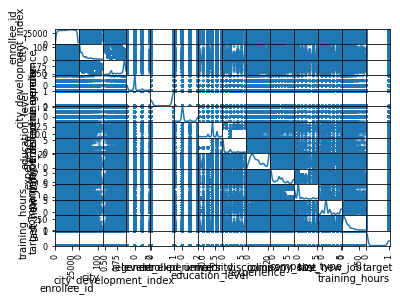

In [8]:
# import the scatter matrix function from the pandas plotting package
from pandas.plotting import scatter_matrix

# If you want to select variable of interest use this df_scatter
#df_scatter = df.loc[:,['default', 'marital', 'job', 'balance', 'loan', 'housing', 'previous']]

#If you want to see all variables use this df_scatter
df_scatter = df
# create scatter matrix from df_scatter and choose the display type of the distribution diagonal
pd.plotting.scatter_matrix(df_scatter, diagonal='kde')

In [9]:
#TODO export matrix image so we can zoom in!

<AxesSubplot:xlabel='gender'>

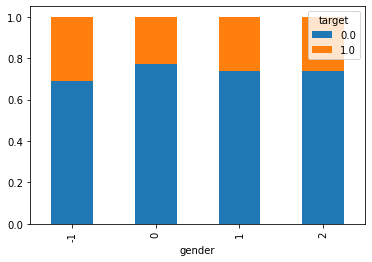

In [10]:
#Normalize each variable and create bar graphs showing how the target is distributed in each variable
crosstab01 = pd.crosstab(df['gender'], df['target'])
crosstab01norm = crosstab01.div(crosstab01.sum(1), axis = 0)
crosstab01norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='enrolled_university'>

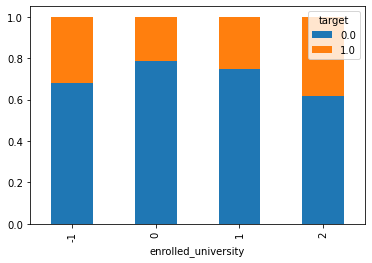

In [11]:
crosstab02 = pd.crosstab(df['enrolled_university'], df['target'])
crosstab02norm = crosstab02.div(crosstab02.sum(1), axis = 0)
crosstab02norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='relevent_experience'>

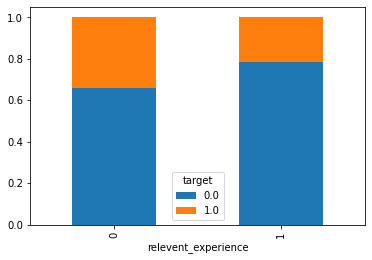

In [12]:
crosstab03 = pd.crosstab(df['relevent_experience'], df['target'])
crosstab03norm = crosstab03.div(crosstab03.sum(1), axis = 0)
crosstab03norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='education_level'>

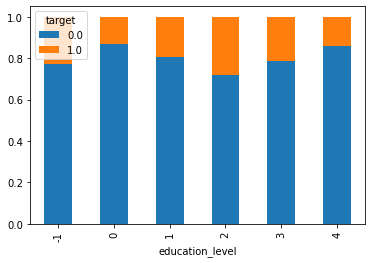

In [13]:
crosstab04 = pd.crosstab(df['education_level'], df['target'])
crosstab04norm = crosstab04.div(crosstab04.sum(1), axis = 0)
crosstab04norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='major_discipline'>

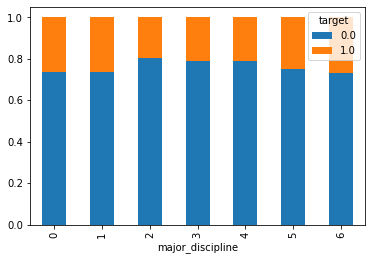

In [14]:
crosstab05 = pd.crosstab(df['major_discipline'], df['target'])
crosstab05norm = crosstab05.div(crosstab05.sum(1), axis = 0)
crosstab05norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='experience'>

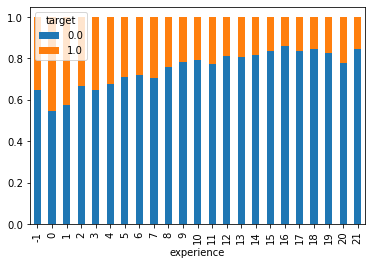

In [15]:
crosstab06 = pd.crosstab(df['experience'], df['target']).sort_values("experience")
crosstab06norm = crosstab06.div(crosstab06.sum(1), axis = 0)
crosstab06norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='company_size'>

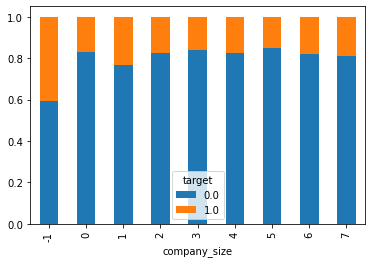

In [16]:
crosstab07 = pd.crosstab(df['company_size'], df['target'])
crosstab07norm = crosstab07.div(crosstab07.sum(1), axis = 0)
crosstab07norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='company_type'>

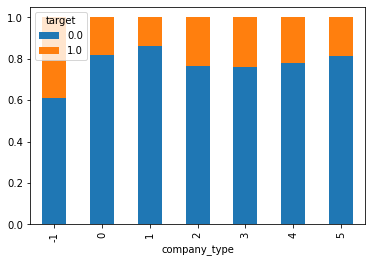

In [17]:
crosstab08 = pd.crosstab(df['company_type'], df['target'])
crosstab08norm = crosstab08.div(crosstab08.sum(1), axis = 0)
crosstab08norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='last_new_job'>

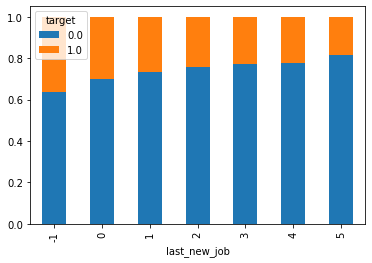

In [18]:
crosstab09 = pd.crosstab(df['last_new_job'], df['target'])
crosstab09norm = crosstab09.div(crosstab09.sum(1), axis = 0)
crosstab09norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='training_hours'>

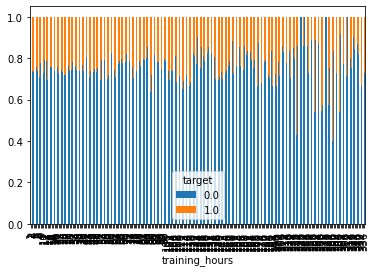

In [19]:
crosstab10 = pd.crosstab(df['training_hours'], df['target'])
crosstab10norm = crosstab10.div(crosstab10.sum(1), axis = 0)
crosstab10norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='city'>

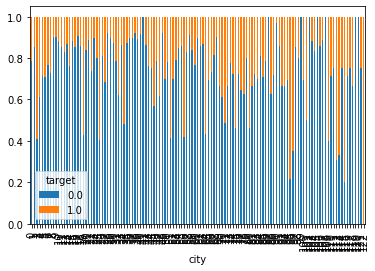

In [20]:
crosstab11 = pd.crosstab(df['city'], df['target'])
crosstab11norm = crosstab11.div(crosstab11.sum(1), axis = 0)
crosstab11norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='city_development_index'>

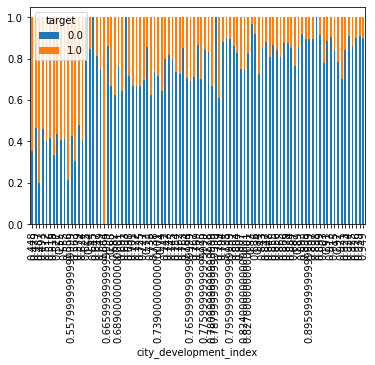

In [21]:
crosstab12 = pd.crosstab(df['city_development_index'], df['target'])
crosstab12norm = crosstab12.div(crosstab12.sum(1), axis = 0)
crosstab12norm.plot(kind='bar', stacked = True)